In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%matplotlib inline

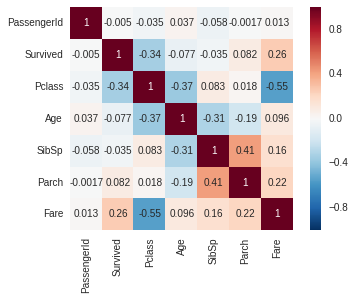

In [3]:
#loading data from csv
data=pd.read_csv('titanic-data.csv')
corr=data.corr()
ax=sns.heatmap(corr,square=True,annot = True)
ax.figure.savefig('Correlation.png')

From the above correlation heat map following questions arises:-


1) How fare rate and class is related with the survival rate?

2) Is survival rate depends on the place from where people had embarked? 

3) How embarked location of people is related with travelling class ?

4) How gender determined the survival rate of people?

Finding Averages and plot between differen variables

->For handling missing values of age lets plot the values in Age

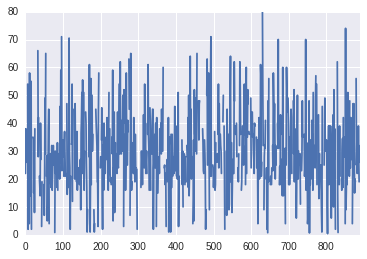

In [4]:
data.Age.plot()

The above graph looks quit random and noisy so its better to fill the missing values with the mean Age.

Lets plot distribution of Age to get the inference on how to fill the missing values.

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:600: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


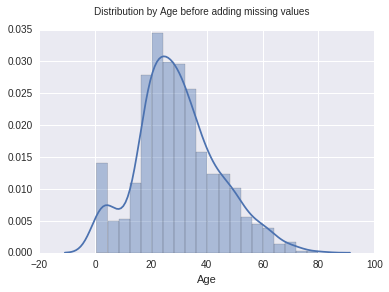

In [5]:
#data.Age.hist()
ax1=sns.distplot(data.Age.dropna());
ax1.figure.suptitle("Distribution by Age before adding missing values")
ax1.figure.savefig("Distribution by Age before adding missing values.png")

The Above distribution of Age looks almost like a bell curve, so it would be a good idea to use mean to fill the missing values

In [6]:
data.Age.fillna(int(data.Age.mean()),inplace=True)

Distribution after filling the missing values 

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:600: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


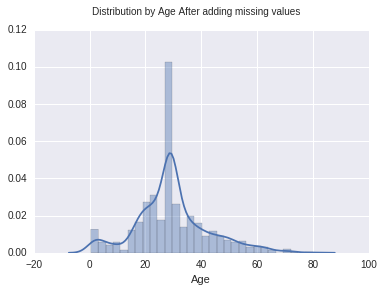

In [7]:
ax1=sns.distplot(data.Age);
ax1.figure.suptitle("Distribution by Age After adding missing values")
ax1.figure.savefig('Distribution by Age After adding missing values.png')

Its good to have the survivors of different age groups so plotting the distribution and their Gender

From the above distribution it can be inferred that replacing missing values with mean does not affect the overall distribution of data.

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


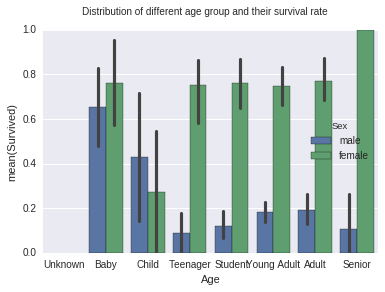

In [8]:
bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
categories = pd.cut(data.Age, bins, labels=group_names)
data.Age=categories

ax2=sns.barplot(x="Age", y="Survived", hue="Sex", data=data)
ax2.figure.suptitle("Distribution of different age group and their survival rate")

Now lets examine the relationship between the class and survival rate as inferred after get the correlation above. So Lets plot the Survival rate and class first.

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


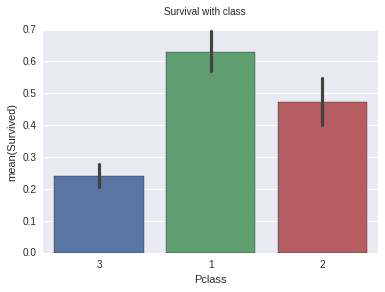

In [9]:
ax3=sns.barplot(x="Pclass",y="Survived",data=data)
ax3.figure.suptitle("Survival with class")
ax3.figure.savefig("Survival with class.png")

The survival rate had an huge influence on the class passengers were travelling to which is reflected in that above plot

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
dtype: int64
Pclass       
1       count    216.000000
        mean       0.629630
        std        0.484026
        min        0.000000
        25%        0.000000
        50%        1.000000
        75%        1.000000
        max        1.000000
2       count    184.000000
        mean       0.472826
        std        0.500623
        min        0.000000
        25%        0.000000
        50%        0.000000
        75%        1.000000
        max        1.000000
3       count    491.000000
        mean       0.242363
        std        0.428949
        min        0.000000
        25%        0.000000
        50%        0.000000
        75%        0.000000
        max        1.000000
dtype: float64


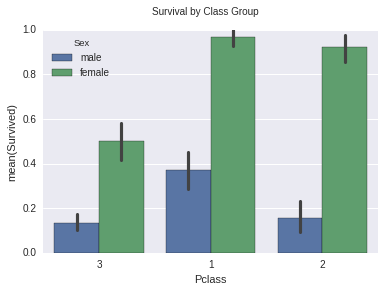

In [10]:
ax2=sns.barplot(x="Pclass", y="Survived", hue="Sex", data=data);
ax2.figure.suptitle("Survival by Class Group")
ax2.figure.savefig('Survival by Class Group.png')
values_class=data.groupby('Survived').Pclass.value_counts()
params_class=data.groupby('Pclass').Survived.describe()

print(values_class)
print(params_class)

Its good to replace the embarked location with their original values

In [11]:
data.replace({'C' :'Cherbourg','Q':'Queenstown','S':'Southampton'},inplace=True)

The survival rate also showed good correlation with the embarked location so lets plot this relationship

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Embarked     Survived
Cherbourg    1            93
             0            75
Queenstown   0            47
             1            30
Southampton  0           427
             1           217
dtype: int64
Embarked          
Cherbourg    count    168.000000
             mean       0.553571
             std        0.498608
             min        0.000000
             25%        0.000000
             50%        1.000000
             75%        1.000000
             max        1.000000
Queenstown   count     77.000000
             mean       0.389610
             std        0.490860
             min        0.000000
             25%        0.000000
             50%        0.000000
             75%        1.000000
             max        1.000000
Southampton  count    644.000000
             mean       0.336957
             std        0.473037
             min        0.000000
             25%        0.000000
             50%        0.000000
             75%        1.000000
             

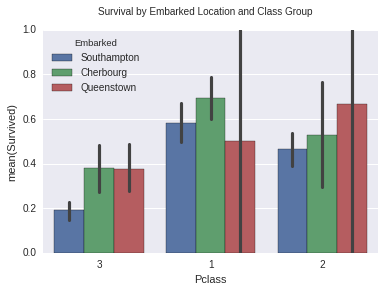

In [12]:
ax3=sns.barplot(x="Pclass", y="Survived", hue="Embarked", data=data);
ax3.figure.suptitle("Survival by Embarked Location and Class Group")
ax3.figure.savefig('Survival by Embarked Location and Class Group.png')

value_embar=data.groupby('Embarked').Survived.value_counts()
embar_params=data.groupby('Embarked').Survived.describe()
print (value_embar)
print (embar_params)

In all the above plots it can be seen the number of female survived is more than the male survivors. So lets calculate the percentage of male and female survivors

In [13]:
female_data=data[data["Sex"]=="female"]
male_data=data[data["Sex"]=="male"]

percent_female_survive= (100*sum(female_data["Survived"]))/(len(female_data["Survived"]))
print("Percentage of female survivors out of total females = ",percent_female_survive)
percent_male_survive= (100*sum(male_data["Survived"]))/(len(male_data["Survived"]))
print("Percentage of male survivors out of total males = ",percent_male_survive)

Percentage of female survivors out of total females =  74.2038216561
Percentage of male survivors out of total males =  18.8908145581


Now lets plot the fare paid and the survival rate. It better to have a regression plot to get clear relation between these variables.

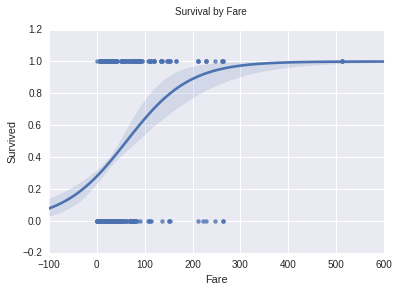

In [14]:
ax3 = sns.regplot(x="Fare", y="Survived",logistic=True,data=data)
ax3.figure.suptitle("Survival by Fare")
ax3.figure.savefig("Survival by Fare.png")

Now from the above analysis above question can be answered regarding survival of Passengers :-

1) Passengers in higher class which is also possitively correlated with fare they had paid, had more number of survivors.

2) From the above plots it is clear that the survival rate depends on the embarked location.

3) Class in which passengers are travelling to also depends on the embarked location and not exactly with the survival rate

4) In all the above relation survival rate depends heavily on gender. As in all section female survivors are more than male survivors.